In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
data = pd.read_csv('/content/milknew.csv')

In [7]:
data.shape

(1059, 8)

In [8]:
data.head(5)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [9]:
data.describe()


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [11]:
# Mengecek/mencari Missing Values
data.isna().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [12]:
data.groupby('Grade').size()

Grade
high      256
low       429
medium    374
dtype: int64

In [13]:
# Mengubah nilai data 'grade' menjadi 0,1 atau 2
data['Grade']=data['Grade'].map({'low':0,'medium':1,'high':2})
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


In [14]:
#  Memisahkan data feature dan label
X=data.drop(['Grade'],axis=1)
y=data['Grade']

In [15]:
X.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255


In [16]:
y.head()

0    2
1    2
2    0
3    0
4    1
Name: Grade, dtype: int64

In [17]:
# Standarisasi menggunakan StandardScaler
sc=StandardScaler()
sc.fit(X)
xscaled=sc.transform(X)
X_scaled=pd.DataFrame(data=xscaled,columns=data.columns[:-1])

In [18]:
# Memisahkan data uji dan data latih
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
X_train.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
331,6.8,40,1,0,1,0,245
44,6.6,45,0,0,0,1,250
307,6.8,45,1,1,1,0,245
323,9.0,43,1,0,1,1,250
1009,9.0,43,1,0,1,1,250


In [20]:
fn = ['pH','Temperature','Taste','Odor','Fat','Turbidity','Colour']
cn = ['0', '1', '2']

In [43]:
# Menghitung Akurasi
dt=DecisionTreeClassifier(splitter='best')
dt.fit(X_train,y_train)
dt_preds=dt.predict(X_test)
print("Akurasi :","{:f}".format(metrics.accuracy_score(dt_preds,y_test)))

Akurasi : 0.990566


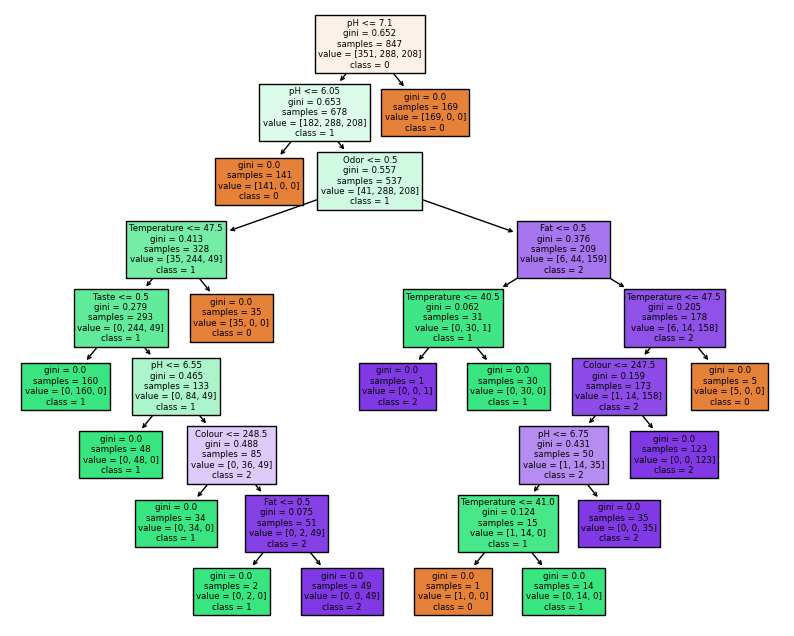

In [44]:
# Menampilkan Decision Tree
fig=plt.figure(figsize = (10,8))
plot_tree(dt, feature_names = fn, class_names = cn, filled = True);
fig.savefig('MilkQuality.png')

In [53]:
# Testing / menguji dengan data baru
new_data=pd.DataFrame({
    'pH':[6.6],
    'Temprature':[35],
    'Taste':[1],
    'Odor':[0],
    'Fat ':[1],
    'Turbidity':[0],
    'Colour':[254]
})
prediction=dt.predict(new_data)
print('Kualitas Susu : ',prediction[0],' (0 = Low, 1 = Medium, 2 = High)')

Kualitas Susu :  2  (0 = Low, 1 = Medium, 2 = High)
